# Q1 
Apply the k-means clustering algorithm (as implemented in Matlab or something else if you prefer) to the heightweight dataset ( second and third columns).  Plot the resulting cluster centres together with the data.  Colour the data according to class label (first column; hint: sort the data!)

In [10]:
import scipy.io
import numpy as np

In [3]:
data = scipy.io.loadmat('heightWeight.mat')

In [5]:
data = data['heightWeightData']

In [8]:
data_xy = data[:,1:]

In [49]:
def naiveKmeans(data, k, epsilon = 0.1):
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    assert len(data.shape) == 2
    centroids = np.random.uniform(data_min, data_max,size=(k,data.shape[1]))
    while 1: 
        dists = []
        for center in range(k):
            distances = np.linalg.norm(data-centroids[center,:], axis=1)
            dists.append(distances)
        dists = np.array(dists)
        clusters = np.argmin(dists, axis=0)
        diffs = []
        for center in range(k):
            new_centroid = np.mean(data_xy[clusters==center],axis=0)
            diff = new_centroid - centroids[center,:]
            centroids[center,:] = new_centroid
            diffs.append(diff)
        diffs = np.array(diffs)
        if (diffs < epsilon).all():
            return centroids  
    

In [71]:
means = naiveKmeans(data_xy,2, epsilon=0.001)

In [53]:
labels= data[:,0]
data1 = data_xy[labels==1]
data2 = data_xy[labels==2]

In [54]:
import matplotlib.pyplot as plt

In [64]:
from sklearn.cluster import KMeans 

In [66]:
km = KMeans(2).fit(data_xy)

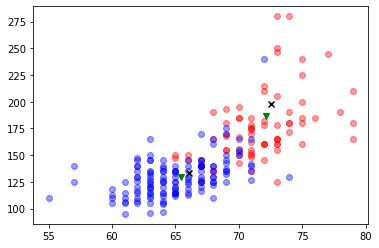

In [69]:
plt.scatter(data1[:,0],data1[:,1], c='r', alpha=0.4)
plt.scatter(data2[:,0],data2[:,1], c='b', alpha=0.4)
plt.scatter(means[:,0],means[:,1], marker='x',c='k')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='v', c='g')

# Q2: 
In Matlab or python, implement the mean shift clustering algorithm as discussed in lectures and papers. To do this, use a “flat” kernel function (you will need to specify the value for the radius parameter, λ). You can choose to implement as either a “blurring” or “non-blurring” process.  

In [73]:
from sklearn.cluster import MeanShift

In [74]:
def MeanShift(data, lamda):
    means = data
    #find each datapoint inside the lambda ball (flat kernel) (using np.linalg.norm)
    #calculate its mean - set means to new mean
    #repeat

Help on class MeanShift in module sklearn.cluster._mean_shift:

class MeanShift(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
 |  
 |  Mean shift clustering using a flat kernel.
 |  
 |  Mean shift clustering aims to discover "blobs" in a smooth density of
 |  samples. It is a centroid-based algorithm, which works by updating
 |  candidates for centroids to be the mean of the points within a given
 |  region. These candidates are then filtered in a post-processing stage to
 |  eliminate near-duplicates to form the final set of centroids.
 |  
 |  Seeding is performed using a binning technique for scalability.
 |  
 |  Read more in the :ref:`User Guide <mean_shift>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, optional
 |      Bandwidth used in the RBF kernel.
 |  
 |      If not given, the bandwidth is estimated using
 |      sklearn.cluster.e